In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf
import os
from tensorflow import keras
from keras import layers
from keras.models import Sequential
from keras import metrics

In [2]:
dataset_dir = os.path.join(os.getcwd(), "CIFAKE")

img_height = 32
img_width = 32
batch_size = 500

# Load training and validation data
train, val = keras.utils.image_dataset_from_directory(
  os.path.join(dataset_dir, "train"),
  validation_split=0.2,
  subset="both",
  seed = 512,
  image_size = (img_height, img_width),
  batch_size = batch_size)

Found 100000 files belonging to 2 classes.
Using 80000 files for training.
Using 20000 files for validation.


In [3]:
# Load test data
test = keras.utils.image_dataset_from_directory(
  os.path.join(dataset_dir, "test"),
  seed = 512,
  image_size = (img_height, img_width),
  batch_size = batch_size)

Found 20000 files belonging to 2 classes.


In [4]:
# Build model
keras.backend.clear_session()

model = Sequential([
    layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
    layers.Flatten(),
    layers.Dense(units=1, use_bias=True, activation="sigmoid")])

In [5]:
# Compile model
model.compile(loss="binary_crossentropy",
                optimizer="adam",
                metrics=["accuracy", metrics.Precision(name="precision"), metrics.Recall(name="recall")])

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 32, 32, 3)         0         
                                                                 
 flatten (Flatten)           (None, 3072)              0         
                                                                 
 dense (Dense)               (None, 1)                 3073      
                                                                 
Total params: 3,073
Trainable params: 3,073
Non-trainable params: 0
_________________________________________________________________


In [7]:
# Train model
epochs = 4

history = model.fit(
  train,
  validation_data=val,
  epochs=epochs,
  verbose=1)

history = pd.DataFrame(history.history)
display(history)

Epoch 1/4
160/160 [==============================] - 45s 259ms/step - loss: 0.6582 - accuracy: 0.6055 - precision: 0.6008 - recall: 0.6282 - val_loss: 0.6321 - val_accuracy: 0.6390 - val_precision: 0.6326 - val_recall: 0.6656
Epoch 2/4
160/160 [==============================] - 13s 81ms/step - loss: 0.6330 - accuracy: 0.6412 - precision: 0.6370 - recall: 0.6557 - val_loss: 0.6228 - val_accuracy: 0.6551 - val_precision: 0.6386 - val_recall: 0.7169
Epoch 3/4
160/160 [==============================] - 40s 239ms/step - loss: 0.6224 - accuracy: 0.6540 - precision: 0.6482 - recall: 0.6728 - val_loss: 0.6180 - val_accuracy: 0.6575 - val_precision: 0.6531 - val_recall: 0.6738
Epoch 4/4
160/160 [==============================] - 11s 66ms/step - loss: 0.6203 - accuracy: 0.6552 - precision: 0.6506 - recall: 0.6701 - val_loss: 0.6156 - val_accuracy: 0.6623 - val_precision: 0.6602 - val_recall: 0.6710


,loss,accuracy,precision,recall,val_loss,val_accuracy,val_precision,val_recall
0,0.658157,0.605512,0.600770,0.628161,0.632090,0.63900,0.632628,0.665602
1,0.633014,0.641187,0.637046,0.655671,0.622849,0.65510,0.638620,0.716925
2,0.622375,0.653988,0.648241,0.672802,0.617995,0.65745,0.653117,0.673789
3,0.620292,0.655225,0.650569,0.670126,0.615642,0.66235,0.660248,0.670994


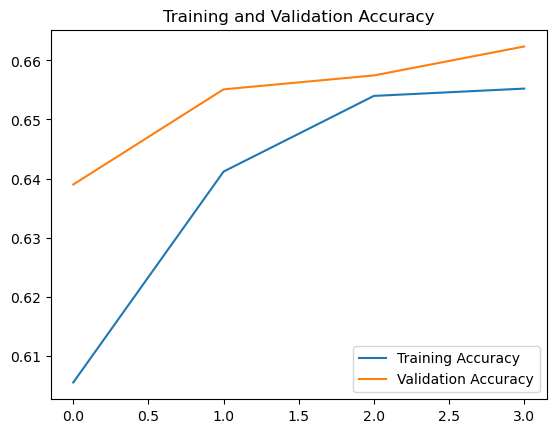

In [8]:
# Plot training and validation accuracy
plt.plot(range(epochs), history["accuracy"], label="Training Accuracy")
plt.plot(range(epochs), history["val_accuracy"], label="Validation Accuracy")
plt.legend(loc="lower right")
plt.title("Training and Validation Accuracy")

plt.show()

In [22]:
# Evaluate on test data
model.evaluate(test, return_dict=True)

40/40 [==============================] - 8s 167ms/step - loss: 0.6157 - accuracy: 0.6604 - precision: 0.6594 - recall: 0.6633


{'loss': 0.6156604290008545,
 'accuracy': 0.6603500247001648,
 'precision': 0.6594094634056091,
 'recall': 0.6632999777793884}